<a href="https://colab.research.google.com/github/moon1z10/mystuff/blob/main/MMR%EA%B3%BC_Glicko_%EB%9E%AD%ED%82%B9_%EC%8B%9C%EC%8A%A4%ED%85%9C%EC%9D%98_%EC%B0%A8%EC%9D%B4%EB%A5%BC_%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MMR(Match Making Rating)과 Glicko 랭킹 시스템은 모두 플레이어의 실력을 평가하고 매치메이킹에 사용되는 시스템이지만, 그 방식과 사용 목적에 있어 차이가 있습니다. 아래에 두 시스템의 주요 차이점을 설명하겠습니다.

# MMR (Match Making Rating)
## 개요
- 목적: 주로 온라인 게임에서 플레이어들을 공정하게 매칭하기 위해 사용됩니다.
- 기본 개념: MMR은 플레이어의 실력을 숫자로 나타내며, 이 숫자를 기반으로 비슷한 실력의 플레이어를 매칭합니다.
- 변동성: MMR은 단순한 점수 변화 시스템을 가지고 있으며, 주로 승리와 패배에 따라 점수가 변합니다. 특정 규칙에 따라 점수 변화가 정해집니다.
- 사용 예: 리그 오브 레전드, 도타 2, 오버워치 등 다양한 온라인 멀티플레이어 게임에서 사용됩니다.
- K-팩터: ELO와 비슷하게, MMR 시스템에서도 점수 변화량을 조절하는 상수(K-팩터)를 사용합니다. 이 값은 게임에 따라 다르게 설정될 수 있습니다.

## 특징
- 단순성: MMR 시스템은 비교적 단순하여 계산과 적용이 쉽습니다.
- 신속성: 실시간으로 많은 플레이어의 매치메이킹을 빠르게 처리할 수 있습니다.
- 실력 반영: 단기간의 성적 변화에 민감하여, 최근 성적이 MMR에 빠르게 반영됩니다.

#Glicko 랭킹 시스템
## 개요
- 목적: 플레이어의 실력을 더 정확하고 신뢰성 있게 평가하기 위해 사용됩니다. 특히, 경기 빈도와 같은 요소도 반영합니다.
- 기본 개념: Glicko 시스템은 기본적인 점수 외에 "변동성(RD, Rating Deviation)"이라는 개념을 추가합니다. 변동성은 점수의 신뢰도를 나타내며, 변동성이 낮을수록 점수가 더 신뢰할 만하다는 뜻입니다.
- 변동성: 플레이어가 경기를 자주 할수록 변동성이 낮아지고, 경기를 오랫동안 하지 않으면 변동성이 높아집니다.
- 사용 예: 체스, 스포츠 리그, e스포츠 리그 등에서 사용됩니다.
- 복잡성: Glicko 시스템은 수학적으로 더 복잡하며, 점수와 변동성을 모두 고려하여 점수를 계산합니다.

## 특징
- 정확성: Glicko 시스템은 플레이어의 실력을 더 정확하게 반영할 수 있습니다. 경기 빈도를 고려하여, 플레이어가 경기를 자주 하지 않더라도 실력을 신뢰성 있게 평가합니다.
- 변동성 반영: 변동성 값을 통해 점수의 신뢰도를 평가할 수 있으며, 이를 바탕으로 보다 정확한 매치메이킹이 가능합니다.
- 초기 변동성: 초기에는 점수 변동이 크지만, 경기를 반복하면서 점수가 안정화됩니다.

# 비교 요약
|특성|MMR|Glicko|
|:----|:----:|:----:|
|목적|공정한 매치메이킹|정확한 실력 평가|
|기본 개념|단순한 점수 시스템|점수 + 변동성(RD) 시스템|
|변동성|점수 변화만 고려|점수 변화 + 변동성 변화 고려|
|신속성|빠르고 간단한 계산|복잡하지만 정확한 계산|
|정확성|최근 성적에 민감|경기 빈도 및 신뢰도를 함께 반영|
|사용 예|온라인 게임 (리그 오브 레전드 등)|체스, 스포츠 리그, e스포츠 리그|
|초기 변동성|빠르게 반영|초기에는 변동성이 크지만 점차 안정화|

이처럼 MMR과 Glicko 랭킹 시스템은 각각의 강점과 용도가 다릅니다. MMR은 빠르고 간단한 매치메이킹에 적합하며, Glicko는 더 정확하고 신뢰성 있는 실력 평가에 적합합니다. 선택은 게임의 특성과 요구에 따라 달라질 수 있습니다.

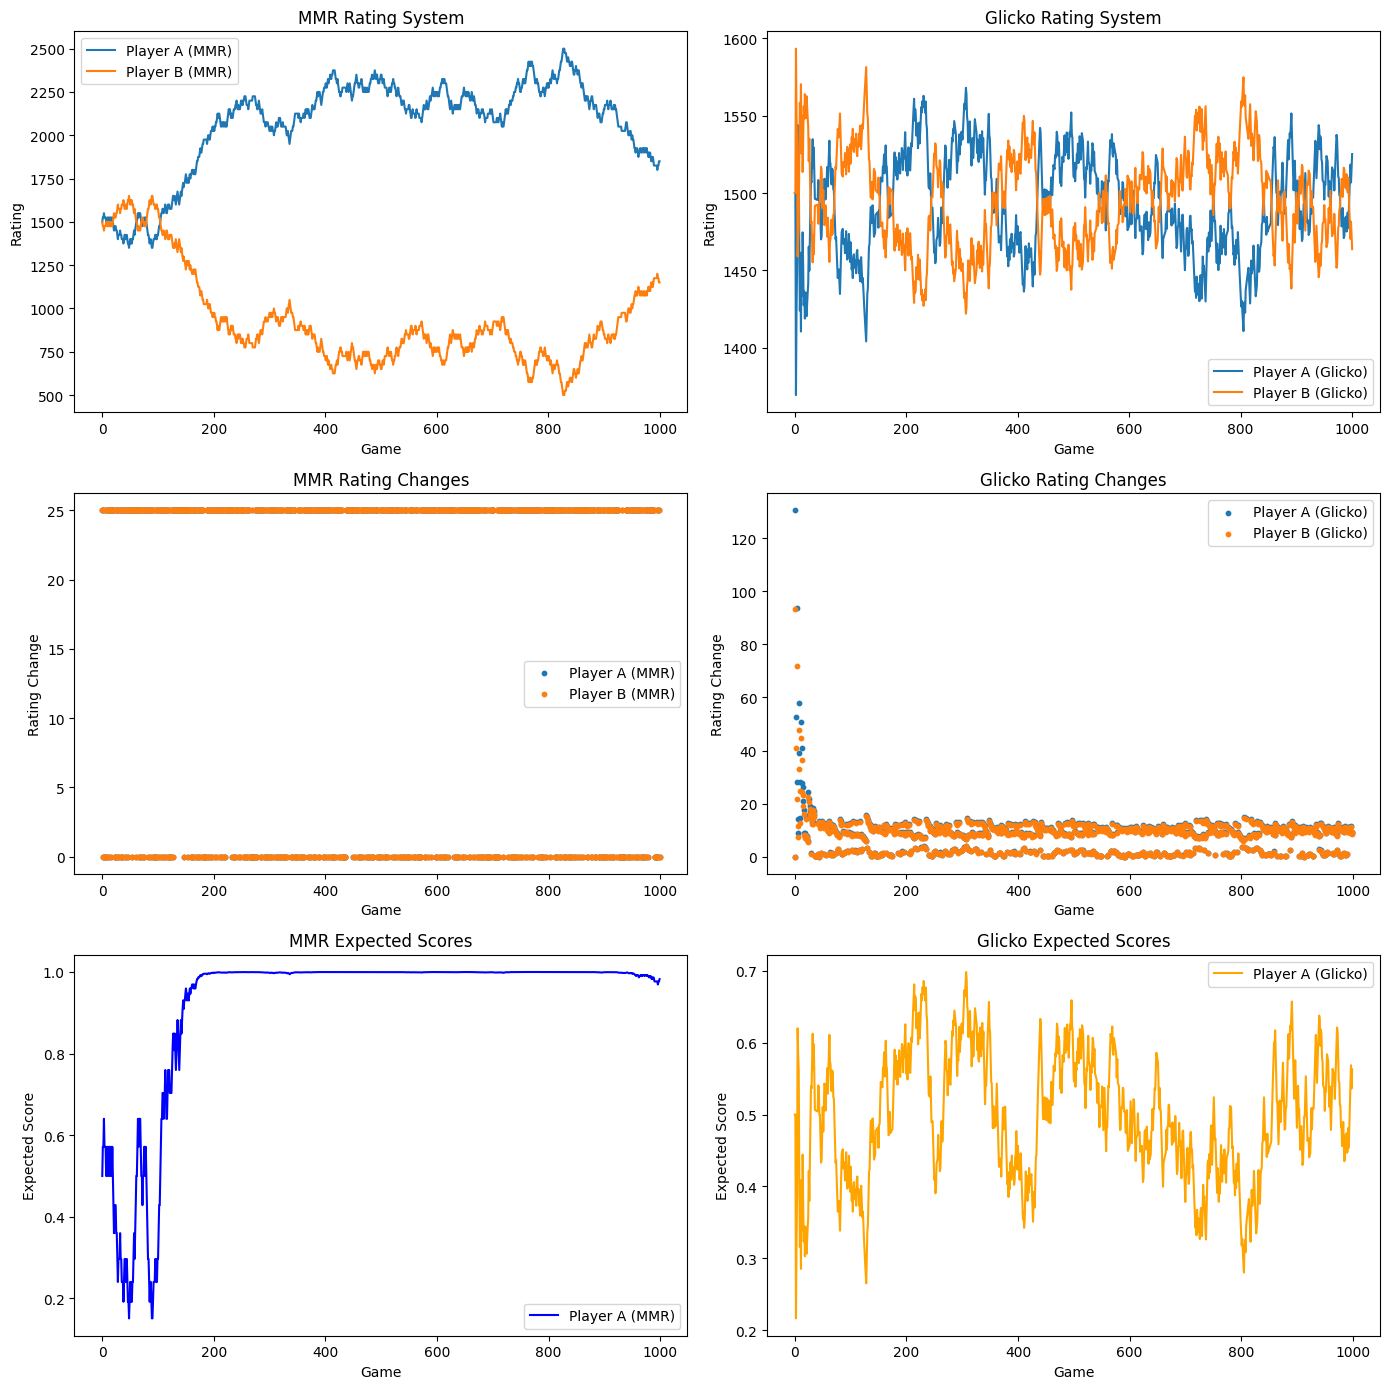

In [4]:
!pip install glicko2 matplotlib
import numpy as np
import matplotlib.pyplot as plt
from glicko2 import Player

class MMRPlayer:
    def __init__(self, rating=1500):
        self.rating = rating

    def update_rating(self, result, win_points=25, lose_points=25):
        if result == 1:
            self.rating += win_points
        elif result == 0:
            self.rating -= lose_points

    def expected_score(self, opponent_rating):
        return 1 / (1 + 10 ** ((opponent_rating - self.rating) / 400))

def simulate_mmr_games(num_games=1000):
    player_a = MMRPlayer()
    player_b = MMRPlayer()
    ratings_a = [player_a.rating]
    ratings_b = [player_b.rating]
    expected_scores_a = []

    for _ in range(num_games):
        # Calculate expected scores
        expected_scores_a.append(player_a.expected_score(player_b.rating))
        # Simulate game result: 1 if A wins, 0 if B wins, 0.5 for draw
        result = np.random.choice([1, 0, 0.5])
        player_a.update_rating(result)
        player_b.update_rating(1 - result)
        ratings_a.append(player_a.rating)
        ratings_b.append(player_b.rating)

    return ratings_a, ratings_b, expected_scores_a

def simulate_glicko_games(num_games=1000):
    player_a = Player()
    player_b = Player()
    ratings_a = [player_a.rating]
    ratings_b = [player_b.rating]
    expected_scores_a = []

    for _ in range(num_games):
        # Calculate expected scores
        expected_score = 1 / (1 + 10 ** ((player_b.rating - player_a.rating) / 400))
        expected_scores_a.append(expected_score)
        result = np.random.choice([1, 0, 0.5])
        player_a.update_player([player_b.rating], [player_b.rd], [result])
        player_b.update_player([player_a.rating], [player_a.rd], [1 - result])
        ratings_a.append(player_a.rating)
        ratings_b.append(player_b.rating)

    return ratings_a, ratings_b, expected_scores_a

def calculate_changes(ratings):
    return [abs(ratings[i] - ratings[i - 1]) for i in range(1, len(ratings))]

def plot_ratings_with_changes_and_expected_scores(mmr_ratings_a, mmr_ratings_b, glicko_ratings_a, glicko_ratings_b, mmr_expected_scores_a, glicko_expected_scores_a):
    mmr_changes_a = calculate_changes(mmr_ratings_a)
    mmr_changes_b = calculate_changes(mmr_ratings_b)
    glicko_changes_a = calculate_changes(glicko_ratings_a)
    glicko_changes_b = calculate_changes(glicko_ratings_b)

    plt.figure(figsize=(14, 14))

    # Plot MMR ratings
    plt.subplot(3, 2, 1)
    plt.plot(mmr_ratings_a, label='Player A (MMR)')
    plt.plot(mmr_ratings_b, label='Player B (MMR)')
    plt.xlabel('Game')
    plt.ylabel('Rating')
    plt.title('MMR Rating System')
    plt.legend()

    # Plot Glicko ratings
    plt.subplot(3, 2, 2)
    plt.plot(glicko_ratings_a, label='Player A (Glicko)')
    plt.plot(glicko_ratings_b, label='Player B (Glicko)')
    plt.xlabel('Game')
    plt.ylabel('Rating')
    plt.title('Glicko Rating System')
    plt.legend()

    # Plot MMR changes (Scatter Plot)
    plt.subplot(3, 2, 3)
    plt.scatter(range(len(mmr_changes_a)), mmr_changes_a, label='Player A (MMR)', s=10)
    plt.scatter(range(len(mmr_changes_b)), mmr_changes_b, label='Player B (MMR)', s=10)
    plt.xlabel('Game')
    plt.ylabel('Rating Change')
    plt.title('MMR Rating Changes')
    plt.legend()

    # Plot Glicko changes (Scatter Plot)
    plt.subplot(3, 2, 4)
    plt.scatter(range(len(glicko_changes_a)), glicko_changes_a, label='Player A (Glicko)', s=10)
    plt.scatter(range(len(glicko_changes_b)), glicko_changes_b, label='Player B (Glicko)', s=10)
    plt.xlabel('Game')
    plt.ylabel('Rating Change')
    plt.title('Glicko Rating Changes')
    plt.legend()

    # Plot MMR expected scores
    plt.subplot(3, 2, 5)
    plt.plot(mmr_expected_scores_a, label='Player A (MMR)', color='blue')
    plt.xlabel('Game')
    plt.ylabel('Expected Score')
    plt.title('MMR Expected Scores')
    plt.legend()

    # Plot Glicko expected scores
    plt.subplot(3, 2, 6)
    plt.plot(glicko_expected_scores_a, label='Player A (Glicko)', color='orange')
    plt.xlabel('Game')
    plt.ylabel('Expected Score')
    plt.title('Glicko Expected Scores')
    plt.legend()

    plt.tight_layout()
    plt.show()

mmr_ratings_a, mmr_ratings_b, mmr_expected_scores_a = simulate_mmr_games()
glicko_ratings_a, glicko_ratings_b, glicko_expected_scores_a = simulate_glicko_games()

plot_ratings_with_changes_and_expected_scores(mmr_ratings_a, mmr_ratings_b, glicko_ratings_a, glicko_ratings_b, mmr_expected_scores_a, glicko_expected_scores_a)


## 1. MMR Rating System
- Ratings (MMR Rating System): Player A와 Player B의 점수가 상당히 다르게 변동하고 있습니다. MMR 시스템에서는 각 승리/패배에 따라 일정한 점수 변동이 발생합니다.
- Rating Changes (MMR Rating Changes): MMR 시스템에서의 점수 변화는 매우 일정합니다. 승리 시 25점, 패배 시 25점이 변동됩니다.
- Expected Scores (MMR Expected Scores): Player A의 예상 승률이 게임 초반에 급격히 변동하다가 1에 가까워지면서 안정화됩니다. 이는 MMR 시스템이 상대적으로 더 빨리 실력 차이를 반영하기 때문입니다.
## 2. Glicko Rating System
- Ratings (Glicko Rating System): Player A와 Player B의 점수가 비교적 복잡하게 변동하고 있습니다. Glicko 시스템은 초기 변동성이 크고 점차 안정화되는 특징이 있습니다.
- Rating Changes (Glicko Rating Changes): 초기에는 점수 변동이 매우 크고, 게임이 진행됨에 따라 점수 변동 폭이 줄어듭니다.
- Expected Scores (Glicko Expected Scores): Player A의 예상 승률이 계속해서 변동하며, 이는 Glicko 시스템이 더 정확하게 실력을 반영하려는 시도를 보여줍니다.
## 해석
- MMR 시스템은 매우 간단하고 점수가 일정하게 변동하는 특징이 있습니다. 이는 빠른 매치메이킹에 유리하지만, 긴 시간 동안 실력을 반영하는 데 한계가 있을 수 있습니다.
- Glicko 시스템은 초기 변동이 크고 점차 안정화되면서 더 정밀한 실력 평가를 제공합니다. 이는 실력이 안정될 때까지 점수 변동이 크며, 경기 빈도와 신뢰도를 고려하여 더 정확한 랭킹을 제공합니다.
- **예상 승률**을 통해 각 시스템이 플레이어의 승리 확률을 어떻게 평가하는지 볼 수 있습니다. MMR 시스템에서는 예상 승률이 비교적 빨리 1에 가까워지는 반면, Glicko 시스템에서는 변동성이 더 큽니다.